In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(‘Training Data: {}’.format(x_train.shape))
print(‘Training Labels: {}’.format(y_train.shape))

Training Data: (60000L, 28L, 28L)
Training Labels: (60000L,)

print(‘Testing Data: {}’.format(x_test.shape))
print(‘Testing Labels: {}’.format(y_test.shape))

Testing Data: (10000L, 28L, 28L)
Testing Labels: (10000L,)

# EDA

fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
ax.matshow(x_train[i])
ax.axis(‘off’)
ax.set_title(‘Number {}’.format(y_train[i]))

fig.show()

SyntaxError: invalid character in identifier (<ipython-input-2-37e6d604d6b4>, line 5)

Using TensorFlow backend.


11493376/11490434 [==============================] - 133s 12us/step
training data:(60000, 28, 28)
training labels:(60000,)
testing data: (10000, 28, 28)
testing labels: (10000,)


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


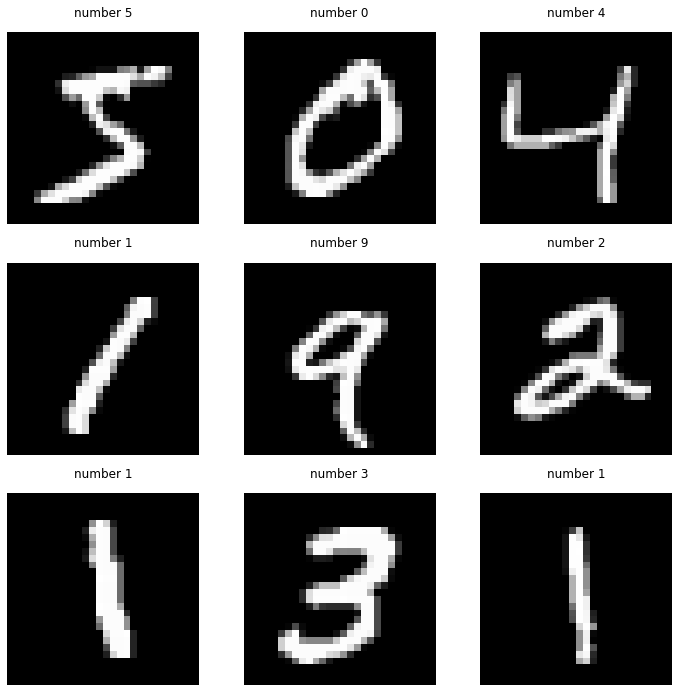

In [3]:
from keras.datasets import mnist

(x_train,y_train), (x_test,y_test) = mnist.load_data()

print('training data:{}'.format(x_train.shape))
print('training labels:{}'.format(y_train.shape))

print('testing data: {}'.format(x_test.shape))
print('testing labels: {}'.format(y_test.shape))

import matplotlib.pyplot as plt

get_ipython().magic(u'matplotlib inline')


fig,axs = plt.subplots(3,3,figsize=(12,12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('number {}'.format(y_train[i]))

fig.show()

In [5]:
X=x_train.reshape(len(x_train),-1)
Y=y_train
X[0]
X=X.astype(float)/255
print(X.shape)
print(X[0].shape)
print(X[0])

(60000, 784)
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [9]:
from sklearn.cluster import MiniBatchKMeans
n_digits = len(np.unique(y_test))
print(n_digits)
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X)
kmeans.labels_[:20]

10


array([8, 3, 2, 1, 0, 4, 1, 8, 1, 0, 8, 1, 9, 7, 1, 6, 4, 0, 7, 0])

In [19]:
def infer_cluster_labels(kmeans,actual_labels):
    inferred_labels={}
    for i in range(kmeans.n_clusters):
        labels=[]
        index=np.where(kmeans.labels_==i)
        labels.append(actual_labels[index])
        if len(labels)==0:
            counts=np.bincount(labels[0])
        else:
            counts=np.bincount(np.squeeze(labels))
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)]=[i]
    return inferred_labels

array=np.ones((1,3))
print(array.shape)
np.bincount(np.squeeze(array).astype(np.uint8))

def infer_data_labels(x_labels,cluster_labels):
    predicted_labels=np.zeros(len(x_labels)).astype(np.uint8)
    for i,cluster in enumerate(x_labels):
        for key,value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i]=key
    return predicted_labels

cluster_labels=infer_cluster_labels(kmeans,Y)
X_clusters=kmeans.predict(X)
predicted_labels=infer_data_labels(X_clusters,cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

(1, 3)
[3 0 4 1 9 2 1 3 1 9 3 1 3 6 1 7 2 9 6 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


number of clusters: 10
inertia:2371793.6078107934
homogenity:0.4423002145456984
accuracy:0.53785

number of clusters: 16
inertia:2235934.3440440116
homogenity:0.5553618296784671
accuracy:0.6577666666666667

number of clusters: 36
inertia:1962220.6888840084
homogenity:0.6805786486143802
accuracy:0.7560666666666667

number of clusters: 64
inertia:1808154.110747736
homogenity:0.7467852725536629
accuracy:0.8163666666666667

number of clusters: 144
inertia:1631309.3971944987
homogenity:0.8054598346307681
accuracy:0.8648666666666667

number of clusters: 256
inertia:1514672.7537530686
homogenity:0.8424871509189864
accuracy:0.90045

testing accuracy:0.8959


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


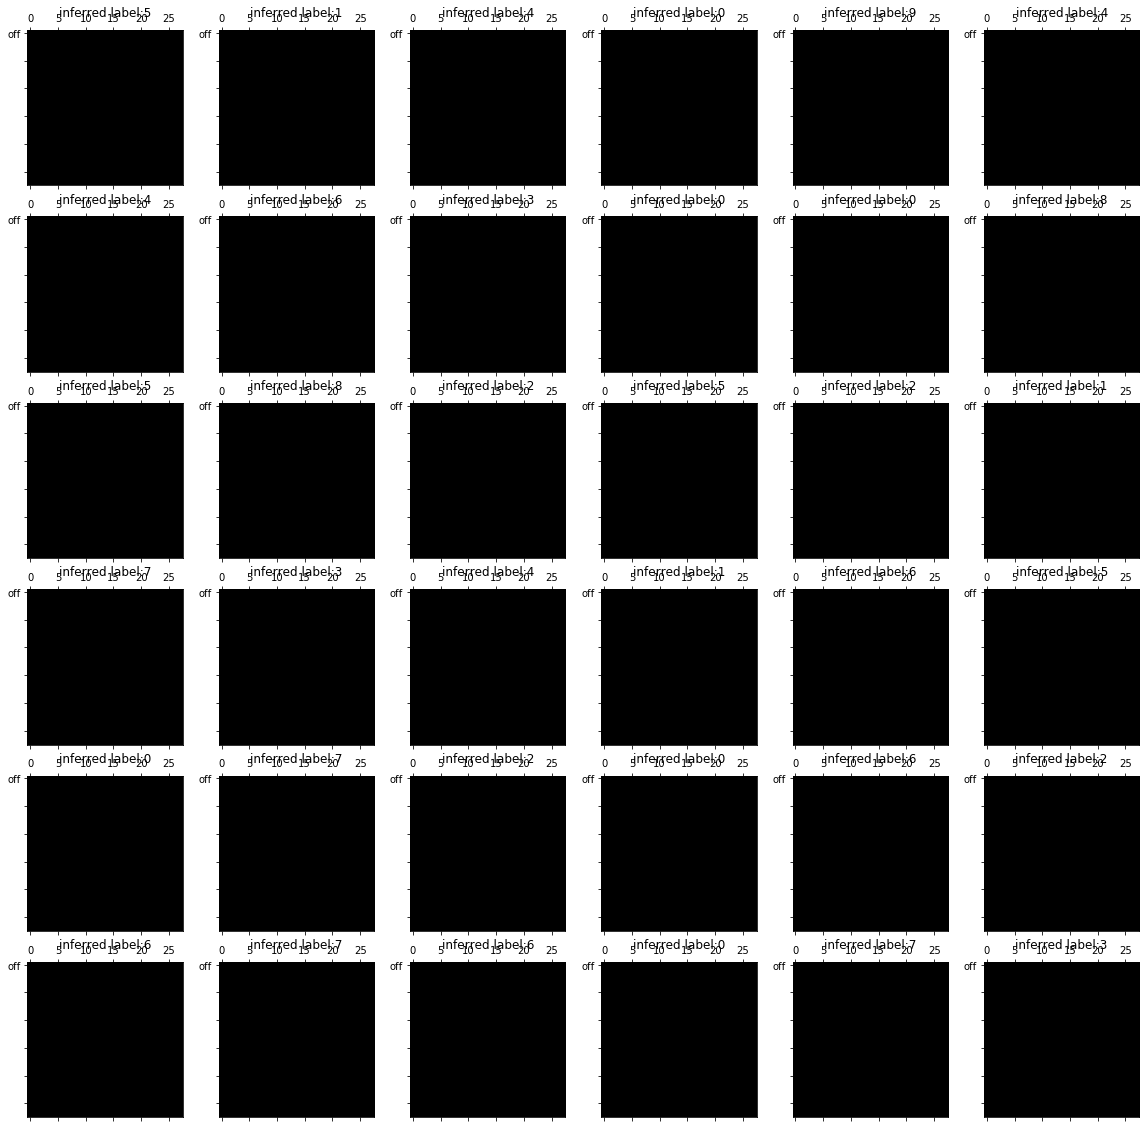

In [24]:
from sklearn import metrics
def calculate_metrics(estimator,data,labels):
    print("number of clusters: {}".format(estimator.n_clusters))
    print("inertia:{}".format(estimator.inertia_))
    print("homogenity:{}".format(metrics.homogeneity_score(labels,estimator.labels_)))
clusters=[10,16,36,64,144,256]
for n_clusters in clusters:
    estimator=MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X)
    calculate_metrics(estimator,X,Y)
    cluster_labels=infer_cluster_labels(estimator,Y)
    predicted_Y=infer_data_labels(estimator.labels_,cluster_labels)
    print("accuracy:{}\n".format(metrics.accuracy_score(Y,predicted_Y)))
X_test=x_test.reshape(len(x_test),-1)
X_test=X_test.astype(float)/255
kmeans=MiniBatchKMeans(n_clusters=256)
kmeans.fit(X)
cluster_labels=infer_cluster_labels(kmeans,Y)
test_clusters=kmeans.predict(X_test)
predicted_labels=infer_data_labels(test_clusters,cluster_labels)
print("testing accuracy:{}".format(metrics.accuracy_score(y_test,predicted_labels)))

kmeans=MiniBatchKMeans(n_clusters=36)
kmeans.fit(X)
centroids=kmeans.cluster_centers_
images=centroids.reshape(36,28,28)
images+=255
images=images.astype(np.uint8)
cluster_labels=infer_cluster_labels(kmeans,Y)

fig,axs=plt.subplots(6,6,figsize=(20,20))
plt.gray()

for i,ax in enumerate(axs.flat):
    for key,value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label:{}'.format(key))
    ax.matshow(images[i])
    ax.plot('off')
fig.show()